# Введение

В настоящем проекте мы сосредоточимся на ключевой задаче HR-аналитики: оптимизации управления персоналом через использование методов машинного обучения. Наш заказчик, компания "Работа с Заботой", столкнулась с вызовом оптимизации уровня удовлетворенности сотрудников и предсказания возможного оттока персонала. 

Уровень удовлетворенности сотрудников играет ключевую роль в эффективности бизнеса, поскольку прямо влияет на их продуктивность и, следовательно, на общий успех компании. Понимание этого показателя поможет улучшить стратегии управления персоналом и минимизировать финансовые потери, связанные с оттоком сотрудников.

Основываясь на данных, предоставленных заказчиком, наша первая задача состоит в создании модели, способной предсказывать уровень удовлетворенности сотрудника на основе их характеристик. Это позволит компании более точно и оперативно оценивать уровень удовлетворенности сотрудников и принимать соответствующие меры для его увеличения.

Далее, мы обратимся к проблеме предсказания возможного оттока сотрудников. Понимание факторов, влияющих на решение сотрудника покинуть компанию, позволит "Работе с Заботой" разработать стратегии удержания персонала и предупреждать потенциальные потери ключевых кадров.

В нашем проекте мы будем использовать навыки анализа данных и машинного обучения, чтобы эффективно решить поставленные задачи и предложить компании "Работа с Заботой" инструменты для более эффективного управления персоналом и снижения рисков, связанных с оттоком сотрудников.

# Задача 1

Основываясь на данных, предоставленных заказчиком, наша первая задача состоит в создании модели, способной предсказывать уровень удовлетворенности сотрудника на основе их характеристик. Это позволит компании более точно и оперативно оценивать уровень удовлетворенности сотрудников и принимать соответствующие меры для его увеличения.

**Описание данных**

*Тренировочная выборка:* train_job_satisfaction_rate.csv

*Входные признаки тестовой выборки:* test_features.csv

*Целевой признак тестовой выборки:* test_target_job_satisfaction_rate.csv

**Признаки**

id — уникальный идентификатор сотрудника;

dept — отдел, в котором работает сотрудник;

level — уровень занимаемой должности;

workload — уровень загруженности сотрудника;

employment_years — длительность работы в компании (в годах);

last_year_promo — показывает, было ли повышение за последний год;

last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;

supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;

salary — ежемесячная зарплата сотрудника;

job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

# 1. Загрузка данных

In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder
)


from sklearn.metrics import (
    f1_score,
    r2_score,
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report)

In [3]:
#функция для построения графика с усами и гистрограммы
def hist_plot(data):
    # Построение гистограммы
    plt.hist(data, bins=30, lw=1, ec='black', color='purple') 
    plt.title('Гистограмма')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(linestyle='dashed')

    # Отображение гистограммы
    plt.show()

    # Построение ящика с усами
    plt.boxplot(data)
    plt.title('Ящик с усами')
    plt.ylabel('Значение')

    # Отображение ящика с усами
    plt.show()
    print('Описательная статистика')
    print(data.describe())
    print('-'*50)

In [4]:
#функция для построения графиков для категориальных признаков
def cat_plots(data):
    # Подсчет количества вхождений каждой категории
    value_counts = data.value_counts()

    # Построение столбчатой диаграммы
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)  # Создаем первый subplot
    plt.bar(value_counts.index, value_counts.values, color='blue')
    plt.title('Столбчатая диаграмма')
    plt.xlabel('Категория')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости

    # Построение круговой диаграммы
    plt.subplot(1, 2, 2)  # Создаем второй subplot
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Круговая диаграмма')

    # Отображение обеих диаграмм
    plt.tight_layout()  # Автоматическое распределение subplot для улучшения визуализации
    plt.show()

In [5]:
train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')

In [6]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [7]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Все названия столбцов соотвествуют описанию, перейдем к следующей таблице

In [8]:
test_features = pd.read_csv('/datasets/test_features.csv')

In [9]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [10]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Все названия столбцов соотвествуют описанию, перейдем к следующей таблице

In [11]:
target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [12]:
target.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [13]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


# 2. Предобработка данных

Проверим табоицу train_job на пропуски:

In [14]:
train_job.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [15]:
train_job['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [16]:
train_job['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

Обнаружили пропуски в двух колонках, создадим пайплайн, который заполнит эти пропуски

In [17]:
# Определение пайплайна
imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')) # Заменяем пропущенные значения на наиболее часто встречающиеся
])
y = train_job['job_satisfaction_rate']
X = train_job.drop(columns='job_satisfaction_rate', axis=1)
dtypes=X.dtypes

# Применение пайплайна к DataFrame
train_job_imputed = imputer.fit_transform(X)

# Преобразуем массив данных обратно в DataFrame
X = pd.DataFrame(train_job_imputed, columns=X.columns).astype(dtypes)
X['job_satisfaction_rate'] = y
train_job = X
# Проверяем типы данных в преобразованном DataFrame
print(train_job.dtypes)

id                         int64
dept                      object
level                     object
workload                  object
employment_years           int64
last_year_promo           object
last_year_violations      object
supervisor_evaluation      int64
salary                     int64
job_satisfaction_rate    float64
dtype: object


In [18]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [19]:
train_job.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Избавились от пропусков, проверим на явные и неявные дубликаты

In [20]:
train_job.duplicated().sum()

0

In [21]:
columns = ['dept', 'level', 'workload', 'last_year_violations', 'last_year_promo']
for column in columns:
    print(column, train_job[column].unique())

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing']
level ['junior' 'middle' 'sinior']
workload ['medium' 'high' 'low']
last_year_violations ['no' 'yes']
last_year_promo ['no' 'yes']


таким образом в train_job не осталось пропусков, нет дубликатов, типы данных указаны корректно, изучим входные признаки тестовой выборки 

In [22]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [23]:
columns = ['dept', 'level', 'workload', 'last_year_violations', 'last_year_promo']
for column in columns:
    print(column, test_features[column].unique())

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'low' 'high' ' ']
last_year_violations ['no' 'yes']
last_year_promo ['no' 'yes']


Видим, что есть еще такие пропуски как ' ', в debt, workload, заменим это на np.nan

In [24]:
test_features.replace(' ', np.nan, inplace=True)

In [25]:
columns = ['dept', 'level', 'workload', 'last_year_violations', 'last_year_promo']
for column in columns:
    print(column, test_features[column].unique())

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'low' 'high' nan]
last_year_violations ['no' 'yes']
last_year_promo ['no' 'yes']


Видим что есть пропуски в столбцах level и debt, заполним их с помощью пайплайна

In [26]:
dtypes=test_features.dtypes

# Применение пайплайна к DataFrame
test_features_imputed = imputer.transform(test_features)

# Преобразуем массив данных обратно в DataFrame
test_features = pd.DataFrame(test_features_imputed, columns=test_features.columns).astype(dtypes)

# Проверяем типы данных в преобразованном DataFrame
print(test_features.dtypes)

id                        int64
dept                     object
level                    object
workload                 object
employment_years          int64
last_year_promo          object
last_year_violations     object
supervisor_evaluation     int64
salary                    int64
dtype: object


In [27]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [28]:
test_features.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

проверим test_features на явные и неявные дубликаты


In [29]:
test_features.duplicated().sum()

0

In [30]:
columns = ['dept', 'level', 'workload', 'last_year_violations', 'last_year_promo']
for column in columns:
    print(column, test_features[column].unique())

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology']
level ['junior' 'middle' 'sinior']
workload ['medium' 'low' 'high']
last_year_violations ['no' 'yes']
last_year_promo ['no' 'yes']


Дубликатов нет, пропуски заполнены, с типами данных все хорошо, идем дальше

Проверим таблицу target на наличие дубликатов

In [31]:
target.duplicated().sum()

0

In [32]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


***Вывод:*** обработка данных завершена, с помощью пайплайнов были заполнены все пропуски, в том числе пропуски в виде пробела, дбликатов в датасетах не оказалось, типы данных в норме

# 3. Исследовательский анализ данных

построим гистограмму и ящик с усами для числовых признаков таблицы train_job

salary


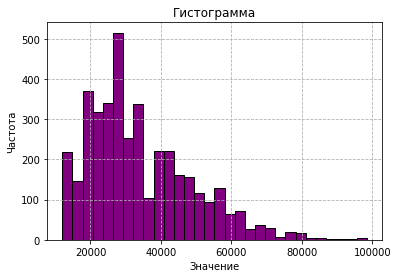

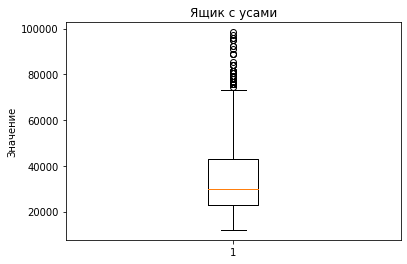

Описательная статистика
count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64
--------------------------------------------------
job_satisfaction_rate


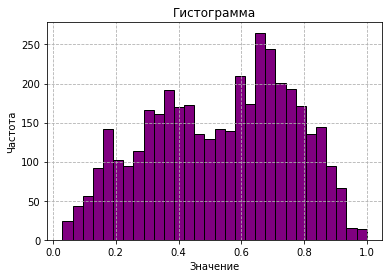

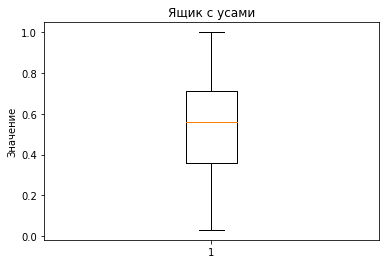

Описательная статистика
count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64
--------------------------------------------------


In [33]:
columns = ['salary', 'job_satisfaction_rate']
for column in columns:
    print(column)
    hist_plot(train_job[column])

Вывод:

1. Значения в столбце salary распределены с перекосом вправо, среднее значение зарплаты - 33926
2. Значение уелевого признака имеет мультимодальное распределение, так как имеет более двух отдельных пиков

Теперь построим графики для категориальных признаков

dept


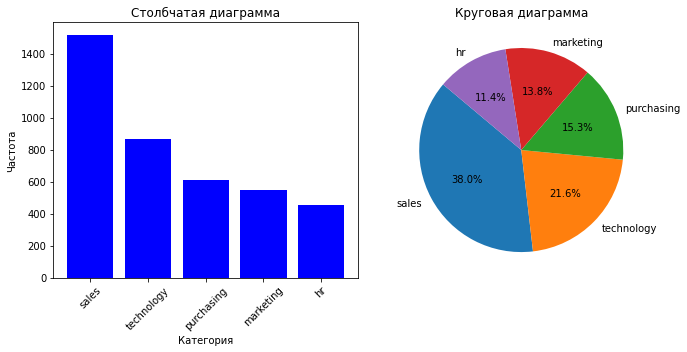

----------------------------------------------------------------------------------------------------
level


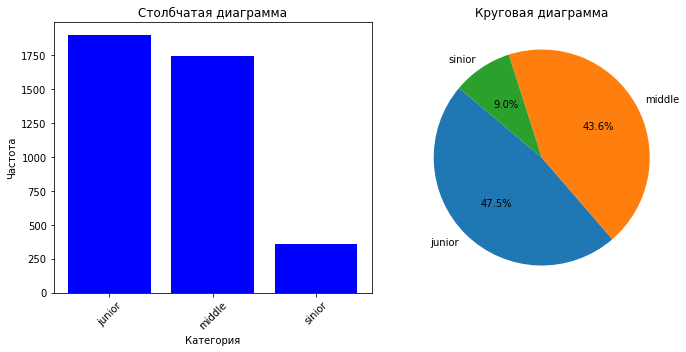

----------------------------------------------------------------------------------------------------
workload


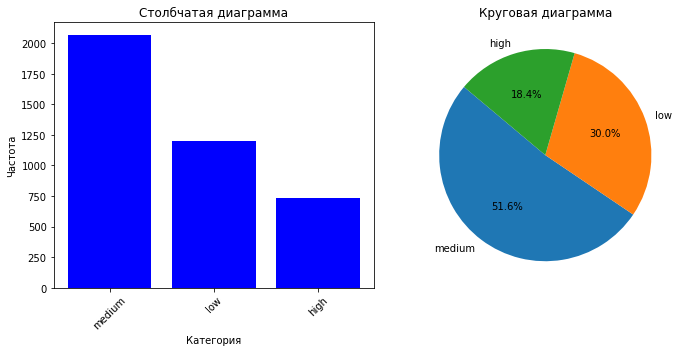

----------------------------------------------------------------------------------------------------
last_year_promo


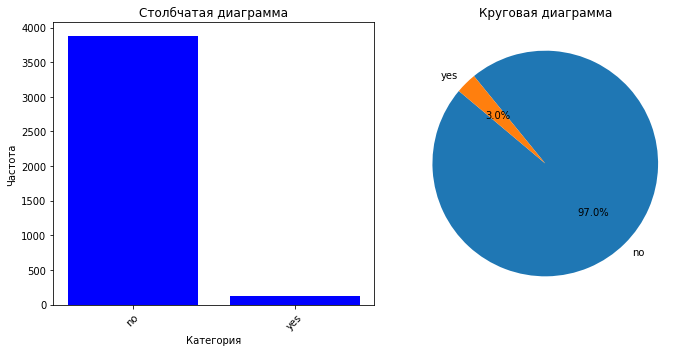

----------------------------------------------------------------------------------------------------
last_year_violations


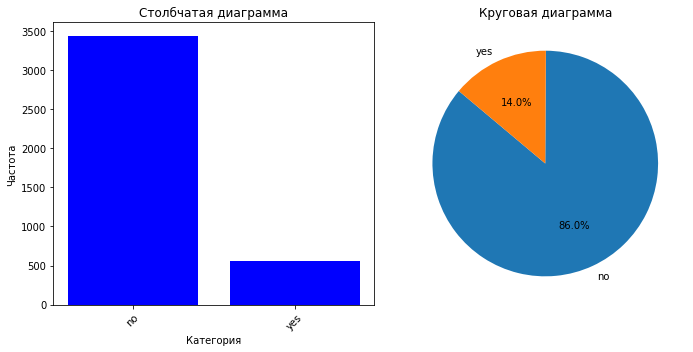

----------------------------------------------------------------------------------------------------
employment_years


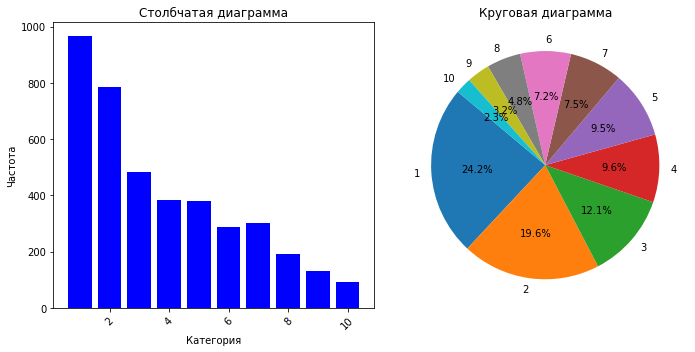

----------------------------------------------------------------------------------------------------
supervisor_evaluation


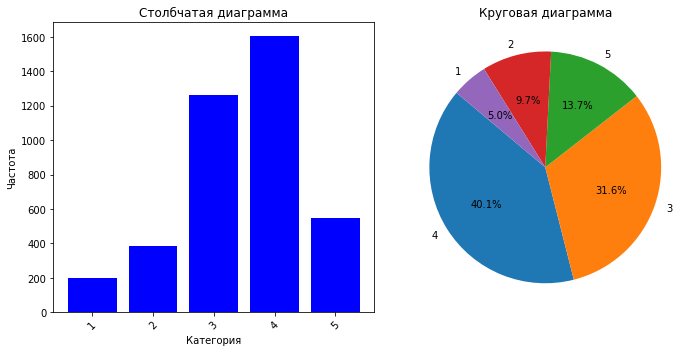

----------------------------------------------------------------------------------------------------


In [34]:
columns = ['dept', 
           'level', 
           'workload', 
           'last_year_promo', 
           'last_year_violations', 
           'employment_years', 
           'supervisor_evaluation']
for column in columns:
    print(column)
    cat_plots(train_job[column])
    print('-'*100)

Вывод:
1. Столбец dept: Преобладает отдел sales - 38%, отдел с наименьшим количеством сотрудников - hr, всего 11.4%
2. Столбец level: Джуны - 47.5%, мидлы - 43.6%, меньше всего оказалось сеньоров - всего 9%
3. Столбец workload: Больше всего работников, со средней загруженностью - 51.6 %
4. Столбец last_year_promo: Всего 3% процента отрудников получили повышение за последний год
5. Столбец last_year_violations: Тут неплохие показатели, мы видим что лишь 14% нарушали договор за последний год
6. Столбец employment_years: Сотрудников с опытом год - 24.2%, а с опытом 10 лет всего 2.3%, чем больше опыт работы, тем меньше сотрудников с данным опытом в компании
7. Столбец supervisor_evaluation: Тут неплохие показатели, оценку  4, руководитель дал аж 40.1% работников, а оценку 1 получили лишь 5%

в целом, все выглядит правдоподобно, поэтому перейдем к следующей таблице test_features, но для начала объединим целевой и входный признак по id

In [35]:
test_merged = pd.merge(test_features, target, on='id')
test_merged.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


salary


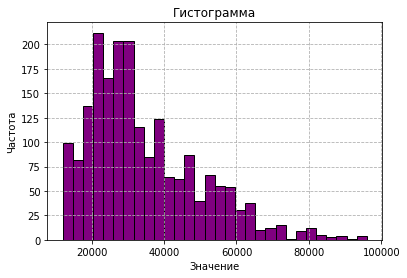

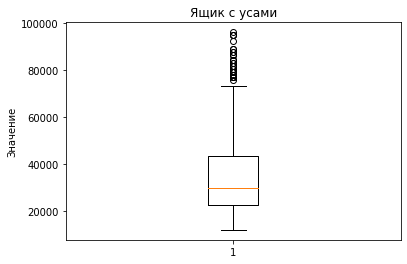

Описательная статистика
count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64
--------------------------------------------------
job_satisfaction_rate


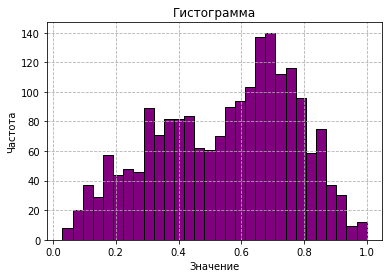

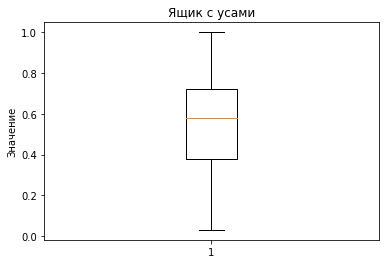

Описательная статистика
count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64
--------------------------------------------------


In [36]:
columns = ['salary', 'job_satisfaction_rate']
for column in columns:
    print(column)
    hist_plot(test_merged[column])

Вывод:

1. Значения в столбце salary распределены с перекосом вправо, среднее значение зарплаты - 34066
2. Значение уелевого признака имеет мультимодальное распределение, так как имеет более двух отдельных пиков

теперь категориальные признаки

dept


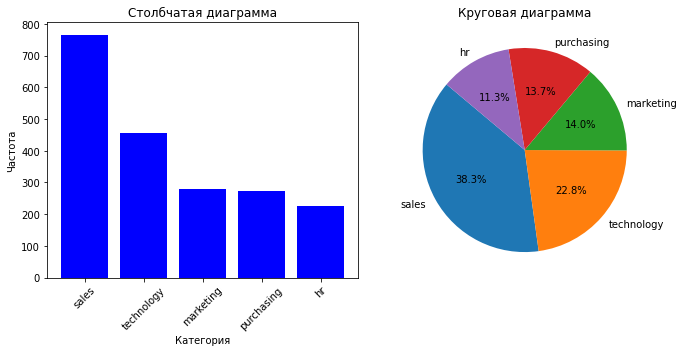

----------------------------------------------------------------------------------------------------
level


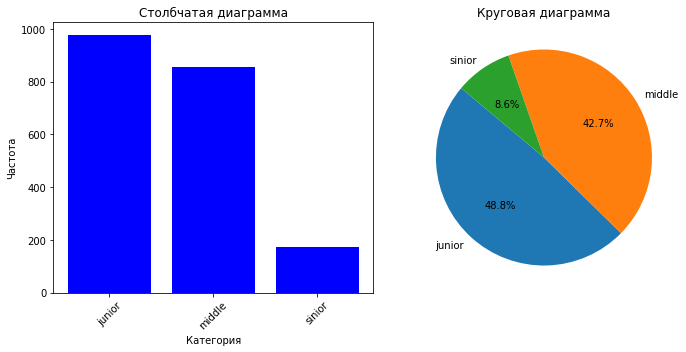

----------------------------------------------------------------------------------------------------
workload


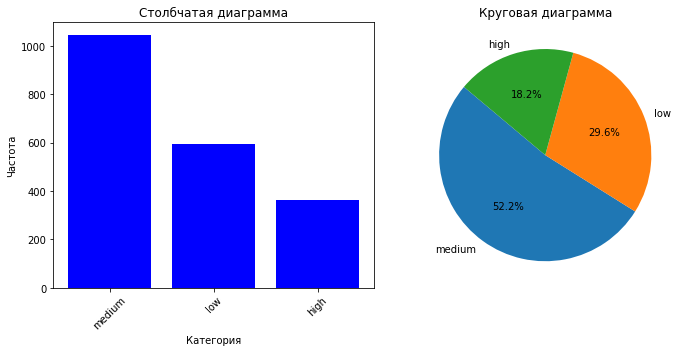

----------------------------------------------------------------------------------------------------
last_year_promo


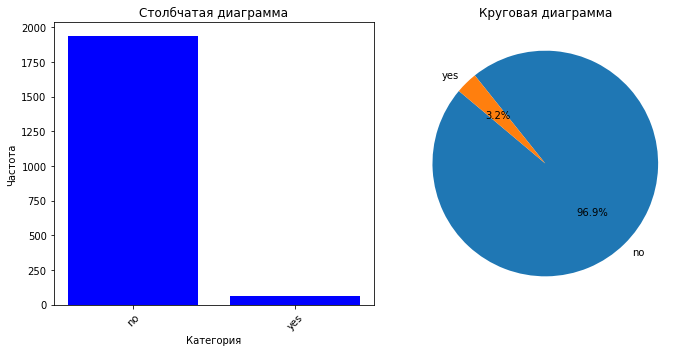

----------------------------------------------------------------------------------------------------
last_year_violations


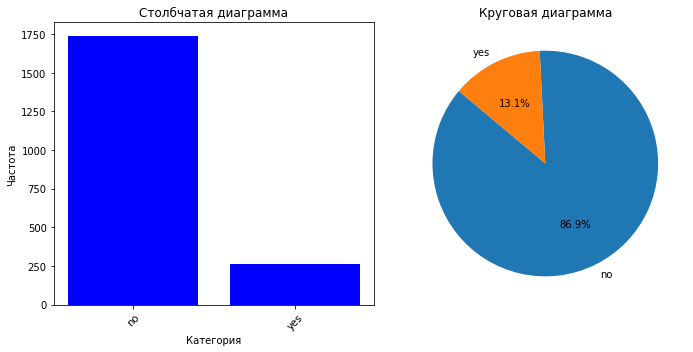

----------------------------------------------------------------------------------------------------
employment_years


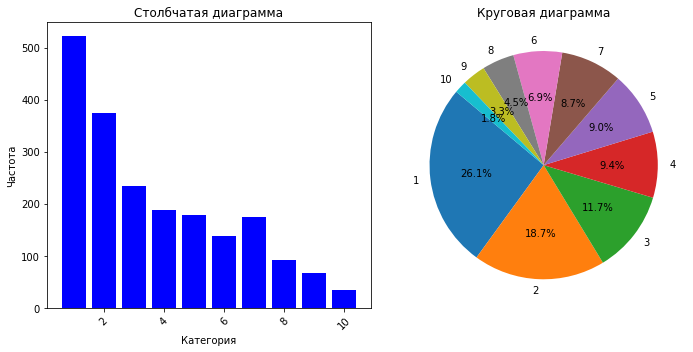

----------------------------------------------------------------------------------------------------
supervisor_evaluation


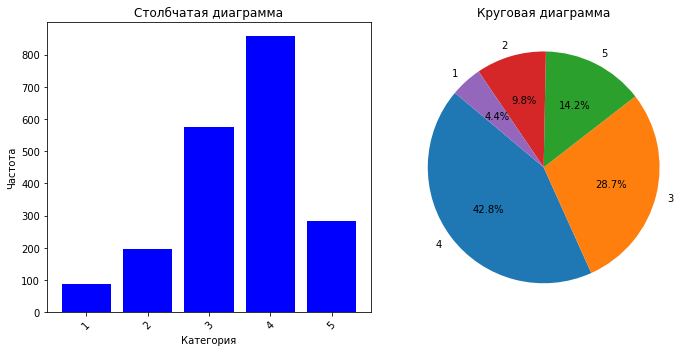

----------------------------------------------------------------------------------------------------


In [37]:
columns = ['dept', 
           'level', 
           'workload', 
           'last_year_promo', 
           'last_year_violations', 
           'employment_years', 
           'supervisor_evaluation']
for column in columns:
    print(column)
    cat_plots(test_merged[column])
    print('-'*100)

Вывод:
1. Столбец dept: Преобладает отдел sales - 38.3%, отдел с наименьшим количеством сотрудников - hr, всего 11.3%
2. Столбец level: Джуны - 48.8%, мидлы - 42.7%, меньше всего оказалось сеньоров - всего 8.6%
3. Столбец workload: Больше всего работников, со средней загруженностью - 52.2 %
4. Столбец last_year_promo: Всего 3.2% процента отрудников получили повышение за последний год
5. Столбец last_year_violations: Тут неплохие показатели, мы видим что лишь 13.1% нарушали договор за последний год
6. Столбец employment_years: Сотрудников с опытом год - 26.1%, а с опытом 10 лет всего 1.8%, чем больше опыт работы, тем меньше сотрудников с данным опытом в компании
7. Столбец supervisor_evaluation: Тут неплохие показатели, оценку  4, руководитель дал аж 42.8% работников, а оценку 1 получили лишь 4.4%

***Вывод:*** Сравнив графики для тренировочных и тестовых данных, можно сказать что они распредленны одинаково, выбросов и аномальных значений обнаружено не было, поэтому можем перейти к построению таблицы корреляции

Таблица кореляции phik для трейна:

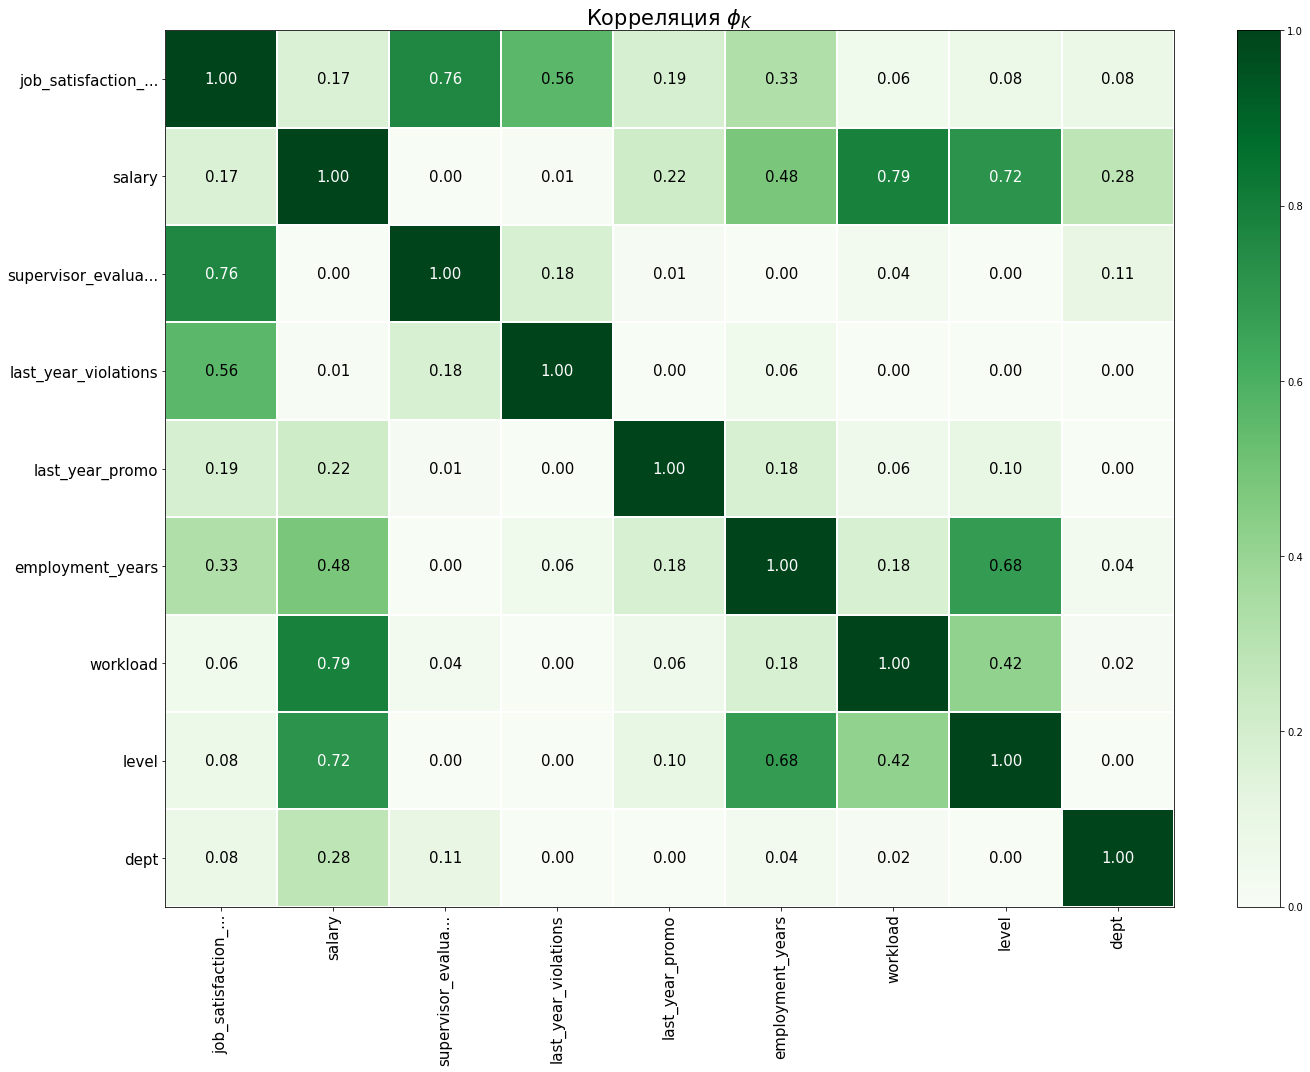

In [38]:
phik_overview = (
    train_job
    .drop('id', axis=1)
    .phik_matrix(verbose=False, interval_cols=['salary', 'job_satisfaction_rate']))


plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

по матрице корреляций можно сказать, что целевой признак - уровень удовлетворенности, а мультиколлинеарность отсутсвует, так как отсутвует корреляция между входными признаками(0.90-0.95)

определим важные признаки и признаки которые практически не коррелируют с целевым признаком

In [39]:
phik_overview['job_satisfaction_rate'].sort_values(ascending=False).tail(8)

supervisor_evaluation    0.764364
last_year_violations     0.560348
employment_years         0.325603
last_year_promo          0.190803
salary                   0.165830
dept                     0.082659
level                    0.080753
workload                 0.056128
Name: job_satisfaction_rate, dtype: float64

Построим тоже самое для тестовых данных

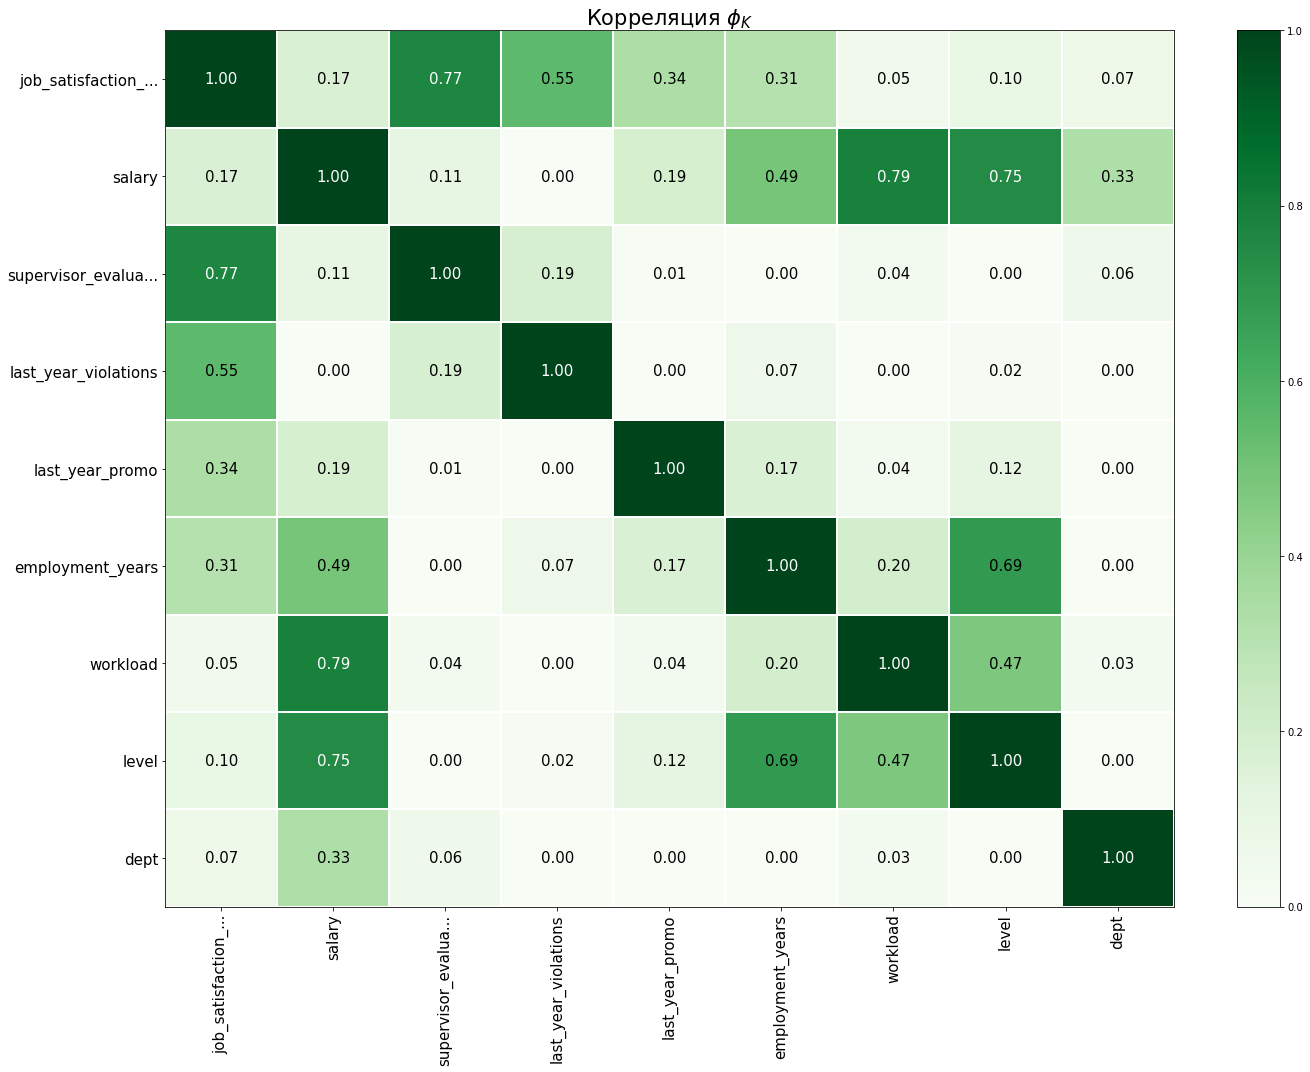

In [40]:
phik_overview = (
    test_merged
    .drop('id', axis=1)
    .phik_matrix(verbose=False, interval_cols=['salary', 'job_satisfaction_rate']))


plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

мультиколлинеарность отсутвует, выведем список значимых признаков

In [41]:
phik_overview['job_satisfaction_rate'].sort_values(ascending=False).tail(8)

supervisor_evaluation    0.769857
last_year_violations     0.554811
last_year_promo          0.337002
employment_years         0.313525
salary                   0.171903
level                    0.097007
dept                     0.073202
workload                 0.052157
Name: job_satisfaction_rate, dtype: float64

***Вывод:***

Была построена таблица корреляции phik для трэйна и для теста, выяснили что мультиколлинеарность отсутсвует, а самым значимым признаком является оценка руководителя и наличие повышения за последний год, на удивление загруженность не коррелирует с целевым признаком

# 4. Подготовка данных

Подготовим данные для обучения модели

Для начала проверим трэйн на наличие дубликатов, после удаления стобца айди

In [42]:
train_job.drop(columns=['id'], axis=1).duplicated().sum()

248

избавимся от этих дубликатов

In [43]:
cleaned_train_job = train_job.drop_duplicates(subset=train_job.columns.difference(['id']))
cleaned_train_job.drop(columns=['id'], axis=1).duplicated().sum()

0

In [44]:
cleaned_train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [45]:
X_train = cleaned_train_job.drop(columns=['job_satisfaction_rate', 'id'], axis=1)

In [46]:
y_train = cleaned_train_job['job_satisfaction_rate']
X_test = test_merged.drop(columns=['job_satisfaction_rate', 'id'], axis=1)
y_test = test_merged['job_satisfaction_rate']

Создадим пайплайн для подготовки данных

In [47]:
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,sales,junior,medium,2,no,no,1,24000
1,hr,junior,high,2,no,no,5,38400
2,sales,junior,low,1,no,no,2,12000
3,technology,junior,low,4,no,no,2,18000
4,hr,junior,medium,1,no,no,3,22800


In [48]:
ohe_columns = ['dept']

ord_columns = ['level',
               'workload', 
               'last_year_promo', 
               'last_year_violations']

num_columns = ['employment_years', 
               'supervisor_evaluation', 
               'salary']

ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='error'))])

ord_pipe = Pipeline(
    [('ord', OrdinalEncoder(
    categories=[
        ['junior', 'middle', 'sinior'], 
        ['low', 'medium', 'high'], 
        ['no', 'yes'],
        ['no', 'yes']], 
    handle_unknown='use_encoded_value', 
    unknown_value=np.nan))])

In [49]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)], 
    remainder='passthrough'
)

pipe_preprocessor = Pipeline(
    [
        ('preprocessor', data_preprocessor)
    ]
)

In [50]:
# Применяем пайплайн к обучающему и тестовому наборам
X_train_processed = pipe_preprocessor.fit_transform(X_train)
X_test_processed = pipe_preprocessor.transform(X_test)

***Вывод:*** мы подготовили данные для обучения с помощью пайплайна, использовав два кодировщика OheEncoder и OrdinalEncoder, скалер MinMaxScaler

# 5. Обучение моделей

Для предсказания уровня удовлетворенности сотрудников обучим две модели, первая - LinearRegression, а вторая DecisionTreeClassifier с подбором гиперпараметров, потом сравним метрики SMAPE и определим, какая модель предсказывает лучше

Создадим функцию для вычисления метрики SMAPE

In [51]:
def smape_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    numerator = np.abs(y_pred - y_test)
    denominator = (np.abs(y_test) + np.abs(y_pred)) / 2
    smape_val = (np.mean(numerator / denominator) * 100)
    return -smape_val # минимизируем SMAPE, поэтому добавляем минус

Обучим модель линейной регрессии

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train_processed, y_train)

LinearRegression()

In [54]:
print(f'SMAPE: {-cross_val_score(model, X_train_processed, y_train, scoring=smape_score).mean()}')

SMAPE: 24.99116375838919


smape > 15, что говорит о том, что модель плохо справилась и надо воспользоваться другой моделью, например  деревом решений

Воспользуемся деревом решений, подберем параметры с помощью RandomizedCearchCV

In [55]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train_processed, y_train)

param_grid = {
    'max_depth': range(1, 140),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6), 
    'max_leaf_nodes' : range(1, 270)
}

In [56]:
# НастройкаRandomizedearchCV с использованием SMAPE в качестве метрики
random_search = RandomizedSearchCV(model_tree, param_grid, cv=5, scoring=smape_score, random_state=42)

In [57]:
random_search.fit(X_train_processed, y_train)

# Получение лучших параметров и оценка качества модели
best_params = random_search.best_params_
best_score = -random_search.best_score_  # переворачиваем обратно знак, т.к. минус добавлен в функции оценки

print("Best Parameters:", best_params)
print("Best SMAPE Score:", best_score)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 202, 'max_depth': 125}
Best SMAPE Score: 15.157776751288868


Таким образом, лучшая модель - DecisionTreeRegressor, со следующими гиперпараметрами:

Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 247, 'max_depth': 68}

Best SMAPE Score: 14.152273876445383

Обучим лучшую модель и посчитаем ее SMAPE на тренировочной и тестовой выборке

In [58]:
best_model = DecisionTreeRegressor(
    min_samples_split=4,
    min_samples_leaf=3,
    max_leaf_nodes=247,
    max_depth=68
)

best_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=68, max_leaf_nodes=247, min_samples_leaf=3,
                      min_samples_split=4)

In [59]:
print(f'SMAPE на тестовой выборке: {-smape_score(best_model, X_test_processed, y_test)}')

SMAPE на тестовой выборке: 13.330282330483719


***Вывод:*** 

Так как критерий успеха - SMAPE <= 15, то мы добились успешного результата благодаря подбору гиперпараметров, данную модель можно использовать для предсказания оценки удовлетворенности работников

# Задача 2

построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании

Для этой задачи будем использовать те же входные признаки, что и в первой задаче, но целевой признак отличается: 

quit — увольнение сотрудника из компании.

# 1. Загрузка данных

In [60]:
train_quit = pd.read_csv('/datasets/train_quit.csv')

In [61]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [62]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


таблица test_features осталась та же, поэтому загрузим целевой признак test_target_quit.csv

In [63]:
target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [64]:
target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [65]:
target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


# 2. Предобработка данных

Проверим таблицу train_quit на наличие пропусков и дубликатов

In [66]:
train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [67]:
columns = ['dept', 'level', 'workload', 'last_year_violations', 'last_year_promo']
for column in columns:
    print(column, train_quit[column].unique())

dept ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level ['middle' 'junior' 'sinior']
workload ['high' 'medium' 'low']
last_year_violations ['no' 'yes']
last_year_promo ['no' 'yes']


In [68]:
train_quit.duplicated().sum()

0

Пропуски отсутсвуют, явные и неявные дубликаты тоже, перейдем к следующей таблице

In [69]:
target_quit.isna().sum()

id      0
quit    0
dtype: int64

In [70]:
target_quit.duplicated().sum()

0

***Вывод:*** Данные оказались чистыми, без дубликатов и пропусков, поэтому переходим к следующему шагу

# 3. Исследовательский анализ данных

Построим графики для таблицы train_quit(), сначала для числовых признаков, а затем для категориальных

salary


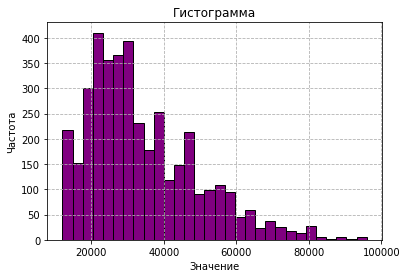

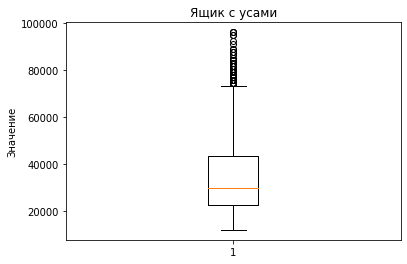

Описательная статистика
count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64
--------------------------------------------------


In [71]:
columns = ['salary']
for column in columns:
    print(column)
    hist_plot(train_quit[column])

dept


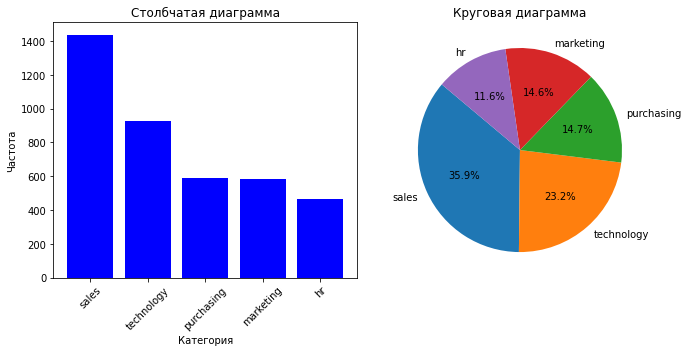

____________________________________________________________________________________________________
level


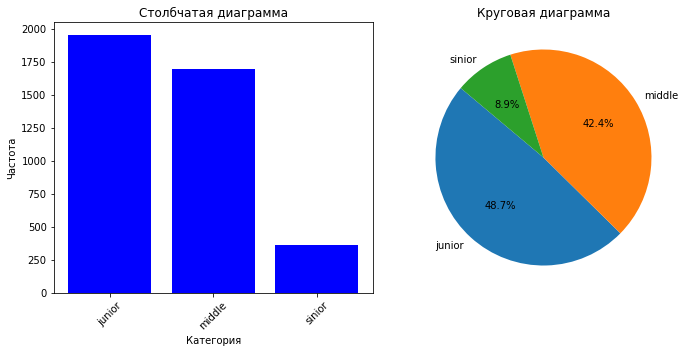

____________________________________________________________________________________________________
workload


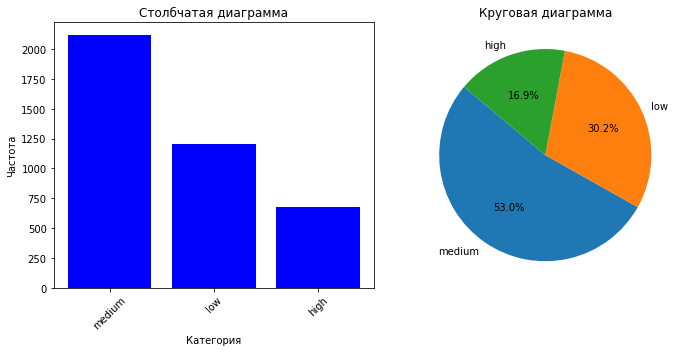

____________________________________________________________________________________________________
last_year_promo


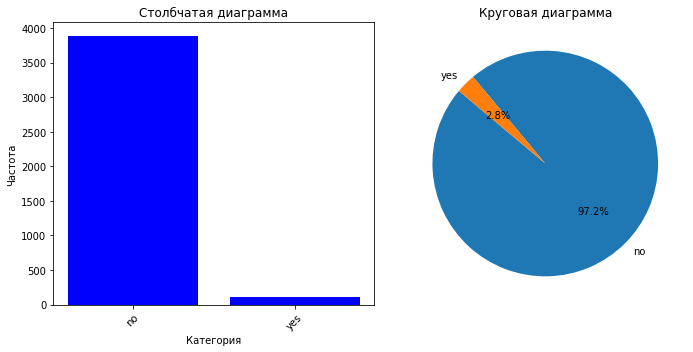

____________________________________________________________________________________________________
last_year_violations


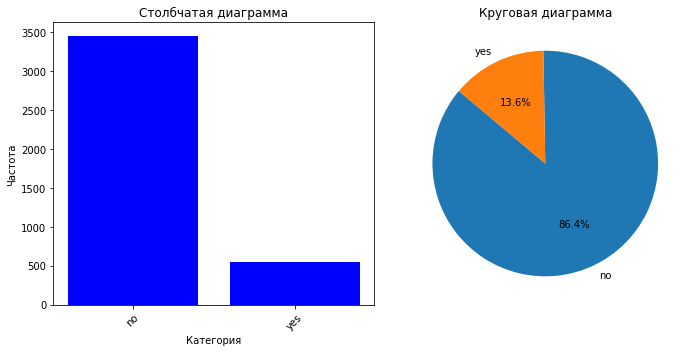

____________________________________________________________________________________________________
quit


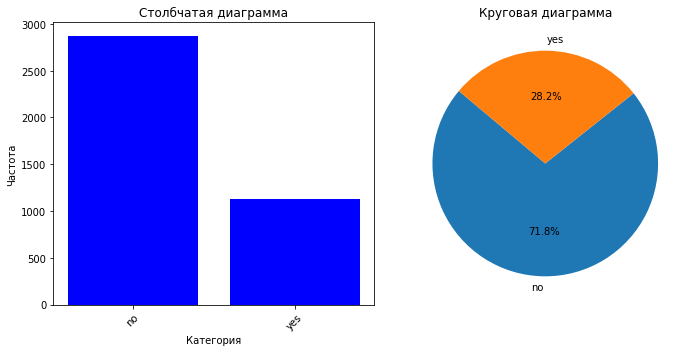

____________________________________________________________________________________________________
employment_years


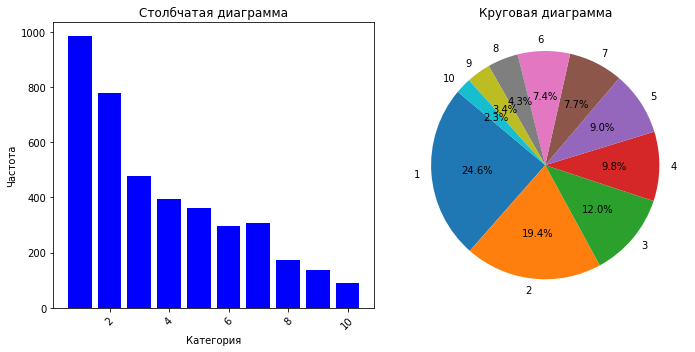

____________________________________________________________________________________________________
supervisor_evaluation


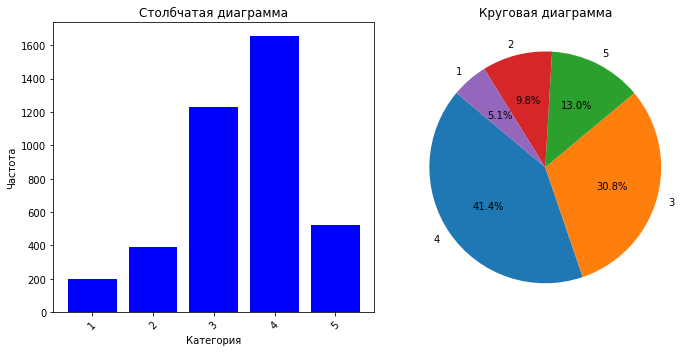

____________________________________________________________________________________________________


In [72]:
columns = ['dept', 
           'level', 
           'workload', 
           'last_year_promo', 
           'last_year_violations', 
           'quit', 
           'employment_years', 
           'supervisor_evaluation']
for column in columns:
    print(column)
    cat_plots(train_quit[column])
    print('_'*100)

Вывод:
1. Значения в столбце salary распределены с перекосом вправо, среднее значение зарплаты - 33805, на трейне же среднее значение salary - 33926, приблизительно равные значения
2. Столбец dept: Преобладает отдел sales - 35.9%, отдел с наименьшим количеством сотрудников - hr, всего 11.6%
3. Столбец level: Джуны - 48.7%, мидлы - 42.4%, меньше всего оказалось сеньоров - всего 8.9%
4. Столбец workload: Больше всего работников, со средней загруженностью - 53 %
5. Столбец last_year_promo: Всего 2.8% процента отрудников получили повышение за последний год
6. Столбец last_year_violations: Тут неплохие показатели, мы видим что лишь 13.6% нарушали договор за последний год
7. Столбец quit: 28.2% сотрудников уволились
7. Столбец employment_years: Сотрудников с опытом год - 24.6%, а с опытом 10 лет всего 2.3%, чем больше опыт работы, тем меньше сотрудников с данным опытом в компании
8. Столбец supervisor_evaluation: Тут неплохие показатели, оценку  4, руководитель дал аж 41.4% работников, а оценку 1 получили лишь 5.1%

Построим матрицу корреляций phik

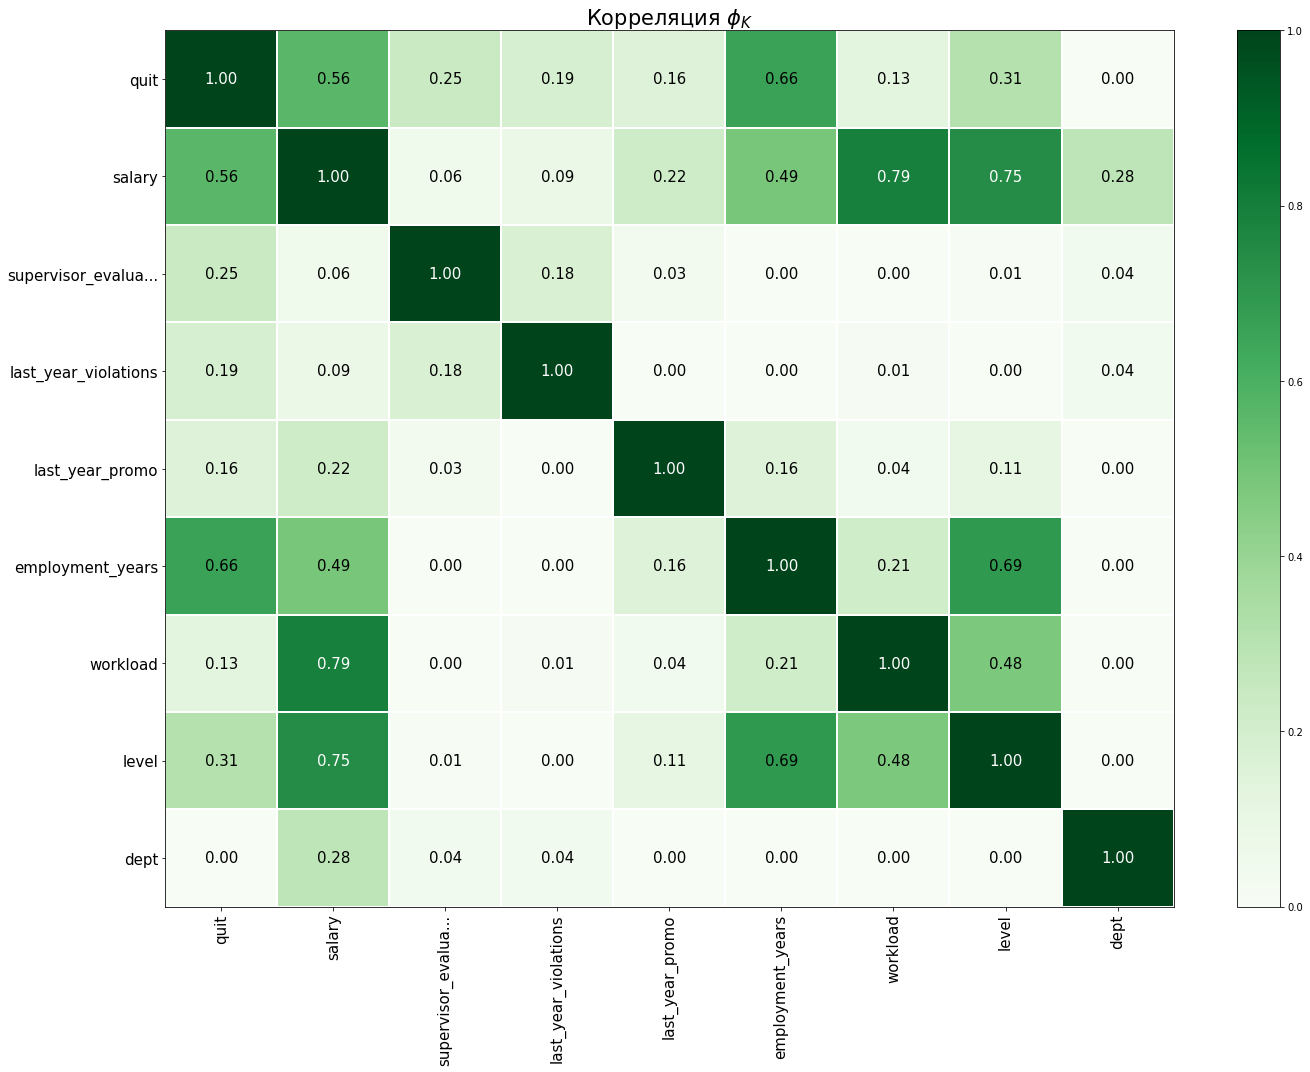

In [73]:
phik_overview = (
    train_quit
    .drop('id', axis=1)
    .phik_matrix(verbose=False, interval_cols=['salary']))


plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

мультиколлинеарность отсутсвует, так как отсутвует корреляция между входными признаками(0.90-0.95)

определим важные признаки и признаки которые практически не коррелируют с целевым признаком

In [74]:
phik_overview['quit'].sort_values(ascending=False).tail(9)

quit                     1.000000
employment_years         0.659093
salary                   0.564154
level                    0.312799
supervisor_evaluation    0.245489
last_year_violations     0.185071
last_year_promo          0.157370
workload                 0.132243
dept                     0.000000
Name: quit, dtype: float64

Больше всего влияет опыт работы, чем он больше, тем меньше вероятность того что сотрудник уволится. Отдел же никак не влияет на то, уволится ли сотрудник или нет

Составим портрет уволившегося сотрудника, для этого построим такие же графики как и выше, но только для тех сотрудников, кто уволился

График зарплаты для ушедших сотрудников:

In [75]:
quited_employees = train_quit[train_quit['quit'] == 'yes']

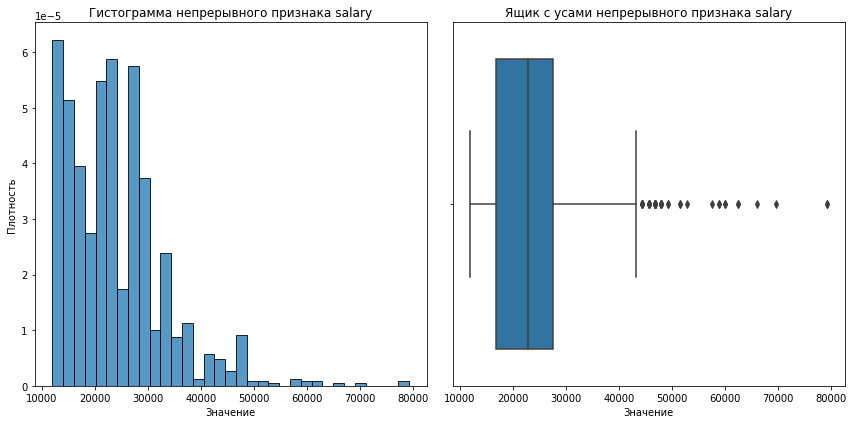

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

In [76]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.histplot(data=quited_employees, x='salary', stat='density')
plt.title('Гистограмма непрерывного признака salary')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)

sns.boxplot(data=quited_employees, x='salary')
plt.title('Ящик с усами непрерывного признака salary')
plt.xlabel('Значение')

plt.tight_layout()

plt.show()

quited_employees['salary'].describe()

График зарплаты для оставшихся сотрудников сотрудников:

In [77]:
stayed_employees = train_quit[train_quit['quit'] == 'no']

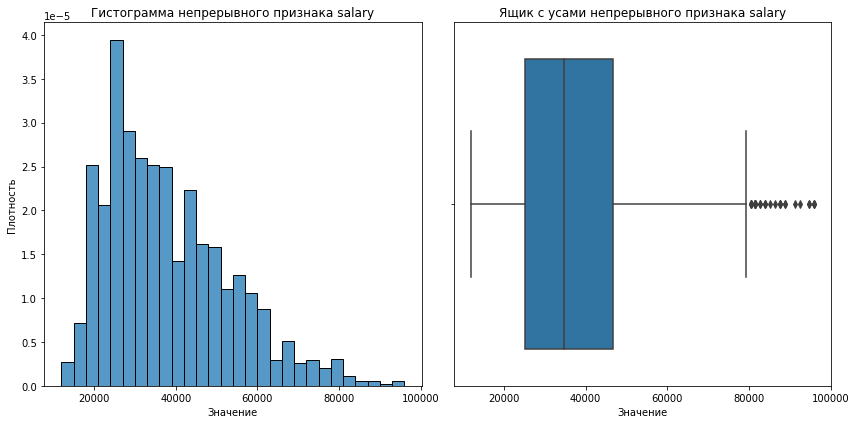

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.histplot(data=stayed_employees, x='salary', stat='density')
plt.title('Гистограмма непрерывного признака salary')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)

sns.boxplot(data=stayed_employees, x='salary')
plt.title('Ящик с усами непрерывного признака salary')
plt.xlabel('Значение')

plt.tight_layout()

plt.show()

stayed_employees['salary'].describe()

Вывод: средняя зарплата ушедших - 23885, а оставшихся - 37702, разница более 10000, маленькая зарплата не устраивает сотрудников, и они принимают решение уйти из компании

графики для категориальных признаков ушедших сотрудников:

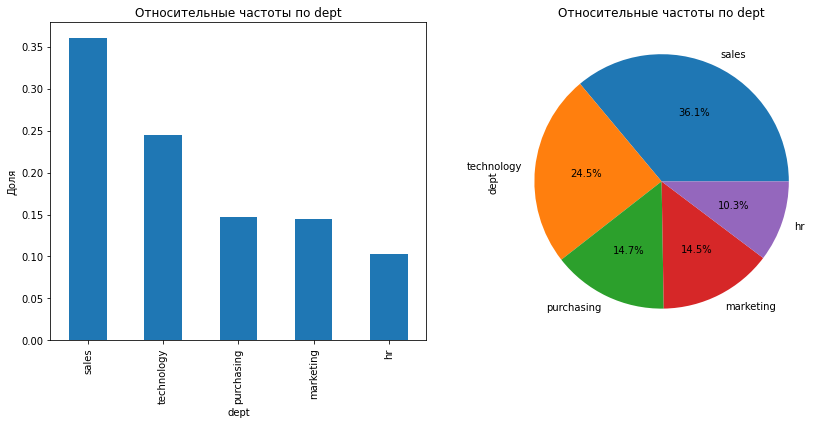

____________________________________________________________________________________________________


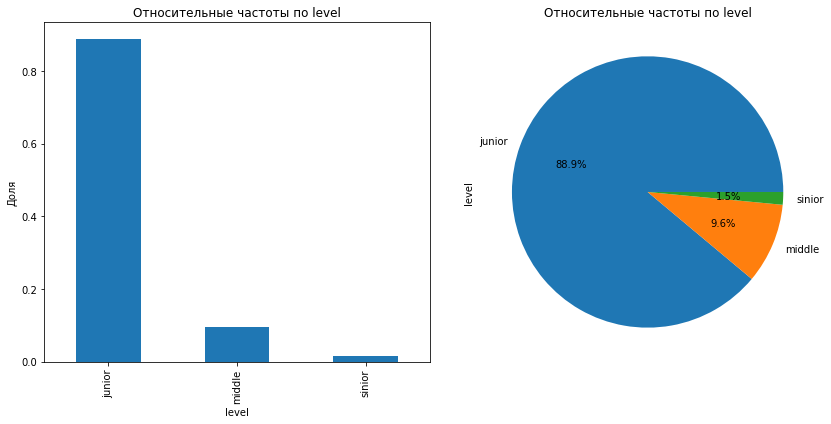

____________________________________________________________________________________________________


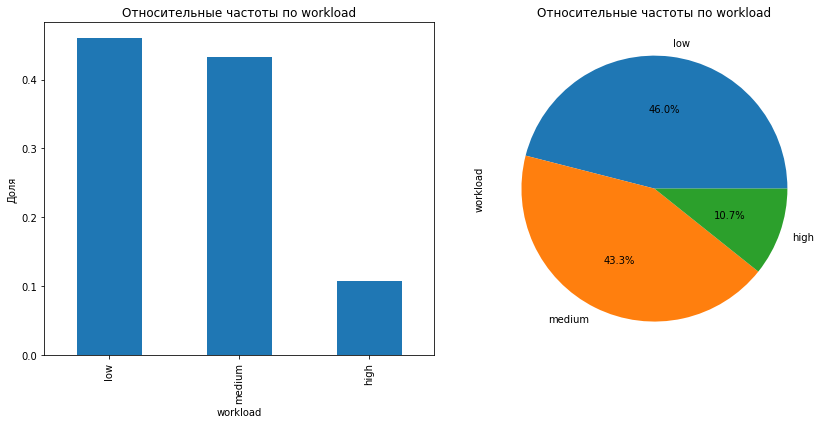

____________________________________________________________________________________________________


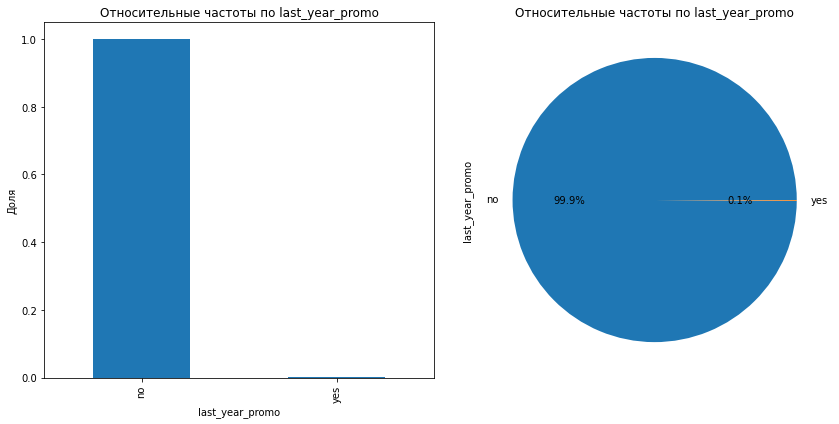

____________________________________________________________________________________________________


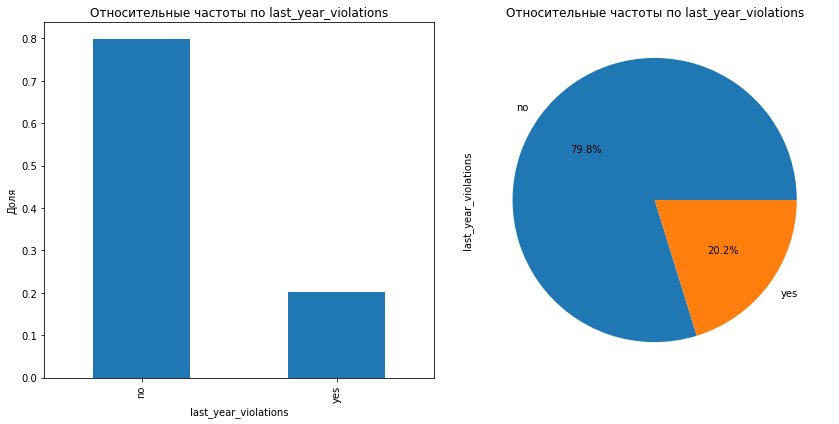

____________________________________________________________________________________________________


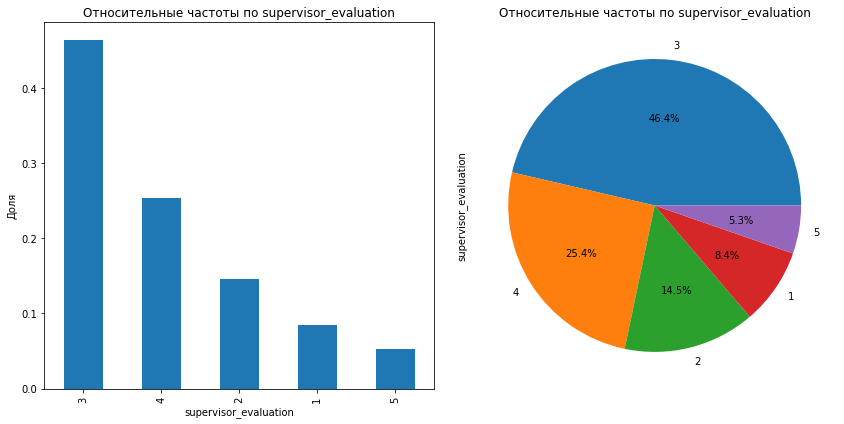

____________________________________________________________________________________________________


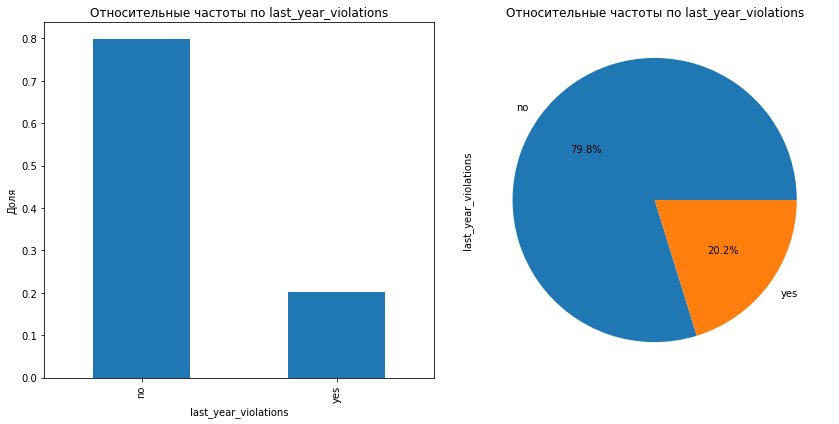

____________________________________________________________________________________________________


In [79]:
columns = ['dept', 
           'level', 
           'workload', 
           'last_year_promo', 
           'last_year_violations', 
           'supervisor_evaluation', 
           'last_year_violations']
for column in columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    quited_employees[column].value_counts(normalize=True).plot(kind='bar')
    plt.title('Относительные частоты по ' + column)
    plt.xlabel(column)
    plt.ylabel('Доля')
    plt.subplot(1, 2, 2)
    # Круговая диаграмма
    quited_employees[column].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
    plt.title('Относительные частоты по ' + column)

    plt.tight_layout()

    plt.show()
    print(100* '_')

Таким образом, судя по графикам чаще всего увольняются следующие работники:
1. работа в компании от 1 до 2 лет
2. оценка от руководителя - 3 
3. зарплата от 12 до 30 тысяч
4. отдел - sales
5. уровень должности - джун
6. с маленькой загруженностью 
7. 99.9 % уволенных не были повышены за прошедший год
8. и в 80% не нарушают трудовой договор за последний год

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение, используя тестовые данные, соединим таблицу test_features с target_quit

In [80]:
test_merged_quit = pd.merge(test_merged, target_quit, on='id')
test_merged_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


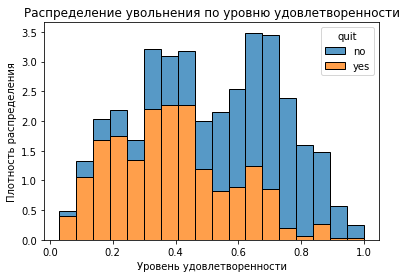

In [81]:
sns.histplot(data=test_merged_quit, x='job_satisfaction_rate', hue='quit', multiple='stack', stat='density', common_norm=False)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Плотность распределения')
plt.title('Распределение увольнения по уровню удовлетворенности')
plt.show()

С помощью этого графика, мы видим, что с ростом уровня удовлетворенности, все меньше и меньше сотрудников увольняются, поэтому утверждение верно

***Вывод:*** 

Был составлен портрет уволившегося сотрудника, а так же мы выяснили что уровень удовлетворенности влияет на увольнения, чем ниже, тем выше вероятность что сотрудник уволится

# 4. Добавление нового входного признака

Так как мы выяснили, что job_satisfaction_rate и quit действительно связаны, спрогнозируем моделью job_satisfaction_rate для каждой выборки с помощью модели best_model

Сначала спрогнозируем для трэйна

In [82]:
train_quit_processed = pipe_preprocessor.transform(train_quit.drop(columns=['id', 'quit'], axis=1))

In [83]:
predicted_rate_train = best_model.predict(train_quit_processed)

In [84]:
train_quit['job_satisfaction_rate'] = predicted_rate_train
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.651778
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.828475
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.369167
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.356875
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.828475


Теперь спронозируем для тестовой выборки

In [85]:
test_merged.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75
5,429973,purchasing,middle,medium,6,no,no,3,42000,0.67
6,850699,technology,junior,medium,3,no,no,3,26400,0.36
7,500791,sales,middle,high,9,no,no,4,49200,0.73
8,767867,marketing,middle,high,3,no,yes,4,62400,0.44
9,937235,sales,junior,medium,1,no,yes,3,26400,0.22


In [86]:
test_quit_processed = pipe_preprocessor.transform(test_merged.drop(columns=['id', 'job_satisfaction_rate'], axis=1))

In [87]:
predicted_rate_test = best_model.predict(test_quit_processed)

In [88]:
test_merged['job_satisfaction_rate'] = predicted_rate_test
test_merged.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.828475
1,686555,hr,junior,medium,1,no,no,4,30000,0.670333
2,467458,sales,middle,low,5,no,no,4,19200,0.660444
3,418655,sales,middle,low,6,no,no,4,19200,0.660444
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556
5,429973,purchasing,middle,medium,6,no,no,3,42000,0.674286
6,850699,technology,junior,medium,3,no,no,3,26400,0.358056
7,500791,sales,middle,high,9,no,no,4,49200,0.674412
8,767867,marketing,middle,high,3,no,yes,4,62400,0.508000
9,937235,sales,junior,medium,1,no,yes,3,26400,0.164286


Теперь соединим таблицу target_quit и test_merged по айди

In [89]:
test_merged1 = pd.merge(test_merged, target_quit, on='id')
test_merged1.shape

(2000, 11)

In [90]:
test_merged1.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.828475,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.670333,no
2,467458,sales,middle,low,5,no,no,4,19200,0.660444,no
3,418655,sales,middle,low,6,no,no,4,19200,0.660444,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556,no
5,429973,purchasing,middle,medium,6,no,no,3,42000,0.674286,yes
6,850699,technology,junior,medium,3,no,no,3,26400,0.358056,yes
7,500791,sales,middle,high,9,no,no,4,49200,0.674412,no
8,767867,marketing,middle,high,3,no,yes,4,62400,0.508000,no
9,937235,sales,junior,medium,1,no,yes,3,26400,0.164286,yes


Заменим целевой признак на 1 и 0, где 1 - да, 0 - нет

In [91]:
label_encoder = LabelEncoder()

# Кодирование целевого признака 'quit' в train_quit и test_merged1
train_quit['quit'] = label_encoder.fit_transform(train_quit['quit'])
test_merged1['quit'] = label_encoder.transform(test_merged1['quit'])

***Вывод:*** имеем, таблица train_quit - тренировочная выборка, таблица test_merged1 - тестовая выборка

# 5. Подготовка данных

In [92]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0,0.651778
1,814010,sales,junior,medium,2,no,no,4,27600,0,0.828475
2,155091,purchasing,middle,medium,5,no,no,1,37200,0,0.369167
3,257132,sales,junior,medium,2,no,yes,3,24000,1,0.356875
4,910140,marketing,junior,medium,2,no,no,5,25200,0,0.828475


Прверим тренировочную выборку на наличие дубликатов без учета айди

In [93]:
train_quit.drop(columns=['id'], axis=1).duplicated().sum()

1413

удалим все дубликаты и разделим данные

In [94]:
cleaned_train_quit = train_quit.drop_duplicates(subset=train_quit.columns.difference(['id']))
cleaned_train_quit.drop(columns=['id'], axis=1).duplicated().sum()

0

In [95]:
X_train_quit = cleaned_train_quit.drop(columns=['id', 'quit'])
y_train_quit = cleaned_train_quit['quit']
X_test_quit = test_merged1.drop(columns=['id', 'quit'])
y_test_quit = test_merged1['quit']

Воспользуемся пайплайном предыдущей задачи, добавим в num_columns новый признак

In [96]:
num_columns = ['employment_years', 
               'supervisor_evaluation', 
               'salary', 
               'job_satisfaction_rate']

# Применяем пайплайн к обучающему и тестовому наборам
X_train_quit_processed = pipe_preprocessor.fit_transform(X_train_quit)
X_test_quit_processed = pipe_preprocessor.transform(X_test_quit)

***Вывод:*** отмасштабировали и применили скалер к входным данным, теперь можем приступать к обучению моделей

# 6. Обучение модели

приступим теперь к созданию пайплайна, будем использовать следующие модели:

KNeighborsClassifier()

DecisionTreeClassifier()

LogisticRegression()

SVC()

In [97]:
RANDOM_STATE=42

pipe_final = Pipeline(
    [
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5)  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5)  
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5)
    },
        {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 7),
        'models__kernel': ['linear', 'rbf']
    }
    
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_iter=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train_quit_processed, y_train_quit)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print(f'Параметры лучшей модели:\n{randomized_search.best_params_}')
print ('Метрика ROC_AUC лучшей модели при кросс-валидации:', (randomized_search.best_score_))

Лучшая модель и её параметры:

 Pipeline(steps=[('models', SVC(C=5, probability=True, random_state=42))])
Параметры лучшей модели:
{'models__kernel': 'rbf', 'models__C': 5, 'models': SVC(C=5, probability=True, random_state=42)}
Метрика ROC_AUC лучшей модели при кросс-валидации: 0.8962818772630771


In [98]:
probabilities_test = randomized_search.predict_proba(X_test_quit_processed)
probabilities_one_test = probabilities_test[:, 1]
roc_auc_test = roc_auc_score(y_test_quit, probabilities_one_test)
print('Метрика ROC-AUC на тестовой выборке с учетом вероятностей:', roc_auc_test)

Метрика ROC-AUC на тестовой выборке с учетом вероятностей: 0.9228278907129734


# 7. Вывод: 
после построения пайплайна, использовав 4 модели DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), SVC(), лучшей оказалась модель SVC() со следующими параметрами:

SVC(kernel='rbf')

с силой 3

и скалером MinMaxScaler()

Метрика ROC_auc при кросс валидации: 0.896

Метрика ROC_auc на тесте: 0.923

# Общий Вывод

Перед нами стояло две задачи:

***Задача 1***

Основываясь на данных, предоставленных заказчиком, наша первая задача состоит в создании модели, способной предсказывать уровень удовлетворенности сотрудника на основе их характеристик. Это позволит компании более точно и оперативно оценивать уровень удовлетворенности сотрудников и принимать соответствующие меры для его увеличения.

Для ее выполнения мы прошли все шаги по предобработке данных, исследовательскому анализу, подготовке данных. Для предсказания уровня удовлетворенности сотрудника выбирали из двух моделей, LinearRegression() без гиперпараметров и DecisionTreeRegression(), к которой подбирали гиперпараметры с вомощью RandomizedSearchCV(), самой лучшей оказалась следующая модель:

DecisionTreeRegressor(max_depth=68, max_leaf_nodes=247, min_samples_leaf=3, min_samples_split=4)

Проверяли ее качество ипользуя метрику SMAPE, для которой отдельно написали функцию:

SMAPE на тренировочной выборке: 11.32372584666214

SMAPE на тестовой выборке: 13.434770848310752

Для достижения успеха необходимо было получить значение данной метрики менее 15 на тестовой выборке, чего нам удалось добиться

***Задача 2***

Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Для ее выполнения мы прошли все шаги по предобработке данных, исследовательскому анализу, подготовке данных. Мы также составили портрет сотрудника, который с большой вероятностью уволится: 

1. работа в компании от 1 до 2 лет
2. оценка от руководителя - 3 
3. зарплата от 12 до 30 тысяч
4. отдел - sales
5. уровень должности - джун
6. с маленькой загруженностью 
7. 99.9 % уволенных не были повышены за прошедший год
8. и в 80% не нарушают трудовой договор за последний год

После чего выяснили, что job_satisfaction_rate и quit действительно связаны, поэтому используя модель по предсказанию уровня удовлетворенности сотрудника, добавили входные признаки в тренировочные и тестовые данные

Для того, чтобы предсказать уволится ли сотрудник из компании, мы создали пайплайн, в котором выбирали лучшую модель с лучшими гиперпараметрами, всего было 4 модели:

KNeighborsClassifier()

DecisionTreeClassifier()

LogisticRegression()

SVC()

после построения пайплайна, использовав 4 модели лучшей оказалась модель SVC() со следующими параметрами:

SVC(kernel='rbf')

с силой 3

и скалером MinMaxScaler()

Метрика ROC_auc при кросс-валидации: 0.896

Метрика ROC_auc на тесте: 0.923

Сократить количество увольнений можно так: 
1. Повысить зарплату
2. Повысить нагрузку
3. Повышать особо активных работников, что будет мотивировать их, оставаться в компании и приносить пользу

In [99]:
print('Код работает исправно')

Код работает исправно
